                          PROJECT 3 - SUPERVISED LEARNING
    
      The Project goal is to predict the likelihood of a liability customer buying personal loans.


Data Description:
    
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted
the personal loan that was offered to them in the earlier campaign.

Context:
    
This case is about a bank (Thera Bank) whose management wants to explore ways ofconverting its liability customers to personal loan customers (while retaining them as
depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing
department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

Steps and tasks:
1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predictthe likelihood of a liability customer 
   buying personal loans
6. Print the confusion matrix for all the above models
7. Give your reasoning on which is the best model in this case and why it performs
   better?


In [1]:
#Importing the required packages
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy.stats import kurtosis, skew, stats
from math import sqrt
from numpy import mean, var
from sklearn import metrics,preprocessing
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import scipy.stats as stats

# Loading the dataset.

In [2]:

bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


From the description provided in the dataset, we can consider 'Personal Loan' as the target variable 

In [3]:
## Checking the shape of the dataset
bank_df.shape #Given dataset has 5000 records with 14 attributes.

(5000, 14)

In [4]:
##Checking the shape of the dataset.
bank_df.size

70000

In [5]:
#Function to display the dimensions of provided dataset. 
bank_df.ndim

2

# Descriptive Statistics

Task 1. Read the column description and ensure you understand each attribute well 

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

All the columns are numeric columns 

In [8]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

bank_df[~bank_df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [9]:
print("Count of null values coulmnwise \n{}".format(bank_df.isnull().sum())) #to check if there is any null value present. 

Count of null values coulmnwise 
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


There are no null values in the dataset

In [10]:
#printing 5 point summary of the data for manual data analysis.
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


From the above statistical description,we can infere that income and Mortgage features have outliers in them.This is because
mean and median are not overlapping.

In [11]:
bank_df.rename(columns = {'Personal Loan':'Personal_Loan','ZIP Code':'ZIP_Code',
                      'Securities Account':'Securities_Account','CD Account':'CD_Account'},inplace=True) 
bank_df.columns
#replacing underscore (_)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
bank_df.drop(['ID','ZIP_Code'],axis = 1, inplace=True)
bank_df.columns
#Dropping the column that are not required in the analysis as they are just the identity.

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

# VISUALIZATION

Task 2. Study the data distribution in each attribute, share your findings


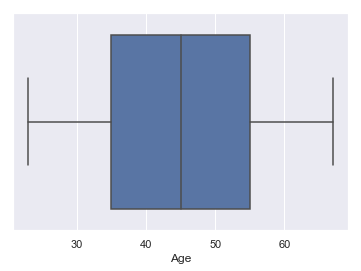

In [13]:
sns.boxplot(bank_df['Age']) # No outliers in Age Feature

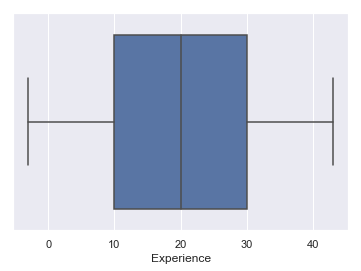

In [14]:
sns.boxplot(bank_df['Experience']) # No outliers in Experience Feature

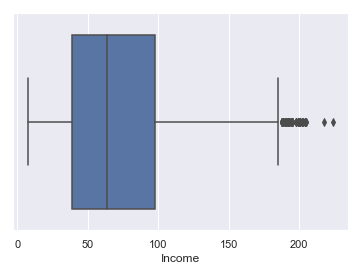

In [15]:
sns.boxplot(bank_df['Income']) # There are few outliers present in the Income feature. We will treat them later

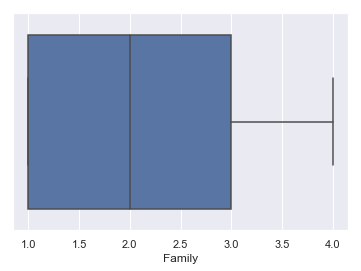

In [16]:
sns.boxplot(bank_df['Family']) # No outliers

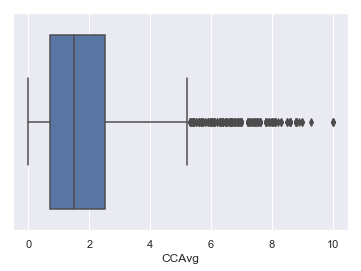

In [17]:
sns.boxplot(bank_df['CCAvg'])   # Outliers are present


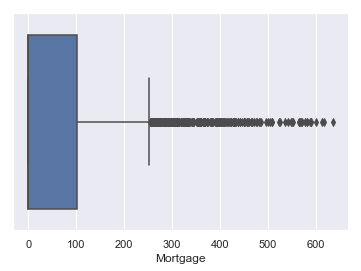

In [18]:
sns.boxplot(bank_df['Mortgage']) # Many outliers are present

From the above graphs, we can how many outliers are present in each feature of the dataset.
Most of the outliers are in Income, Mortgage, and CCAvg.
We will now treat the outliers present in income feature. Since Mortgage and CCAvg are important variables related 
to our dataset, we are not going to remove the outliers in those two features. We will treat the outliers in Income 
feature by capping them with upper whisker.

In [19]:
up_whisk=bank_df["Income"].quantile(0.75)+1.5*(bank_df["Income"].quantile(0.75) - bank_df["Income"].quantile(0.25))

for i in bank_df['Income']:
    if(i > up_whisk):
        bank_df['Income']=bank_df['Income'].replace(i,up_whisk)

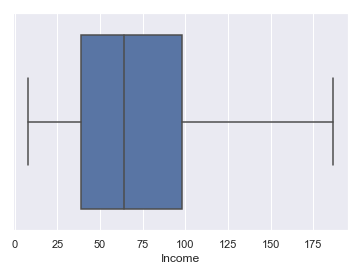

In [20]:
sns.boxplot(bank_df['Income']) 

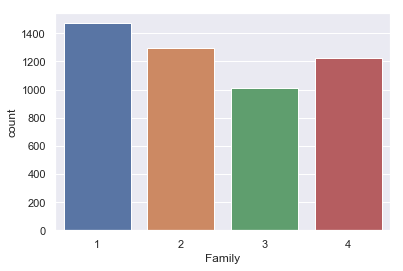

In [21]:
sns.countplot(x = bank_df['Family']) # From the count plot, all families have almost equal members in it.

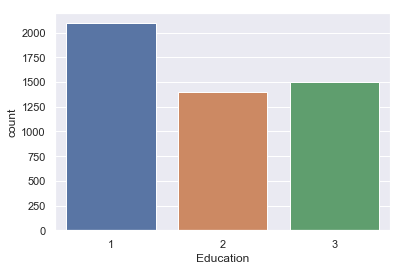

In [22]:
sns.countplot(x = bank_df['Education']) # Most of the persons in the dataset are undergrads

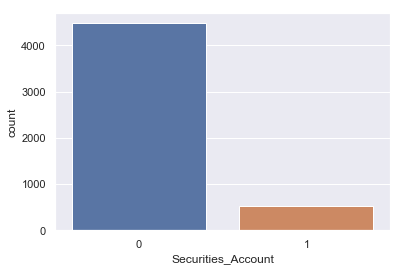

In [23]:
sns.countplot(x = bank_df['Securities_Account']) # More number of people do not have securities account at the bank

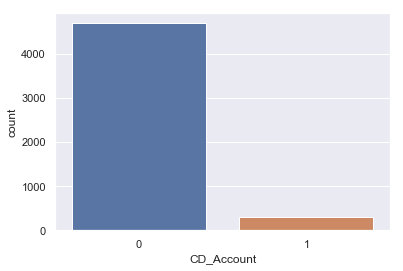

In [24]:
sns.countplot(x = bank_df['CD_Account'])  # more customers have no CD account

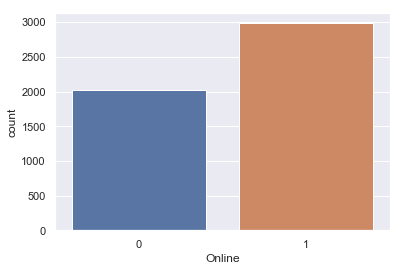

In [25]:
sns.countplot(x = bank_df['Online'])  # More number of customers use online transaction compared to offline transactions

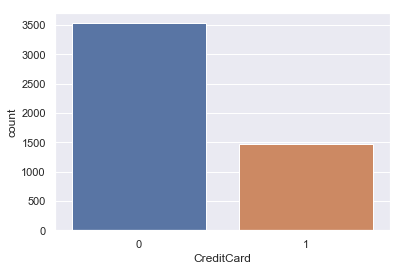

In [26]:
sns.countplot(x = bank_df['CreditCard']) # Not many people use credit card issued by the bank

TASK 3. Get the target column distribution. Your comments 

In [27]:
# Let us look at the target column which is 'personal loan' to understand how the data is distributed amongst the various values
bank_df.groupby(["Personal_Loan"]).count()

# Most people do not have personal loan. The ratio isfavor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


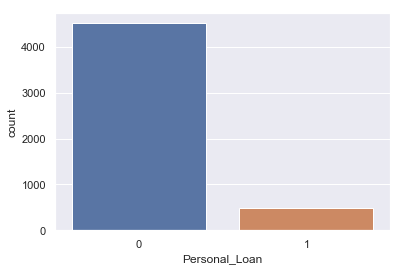

In [28]:
sns.countplot(x = bank_df['Personal_Loan']) 
# From the graph, it is very clear that only very few customers get personal loan from the bank.

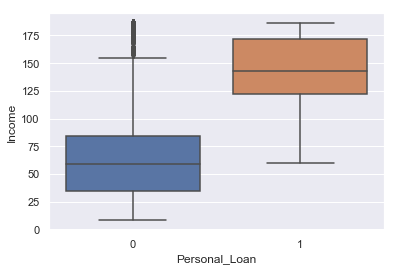

In [29]:
sns.boxplot(y='Income',x='Personal_Loan',data = bank_df)

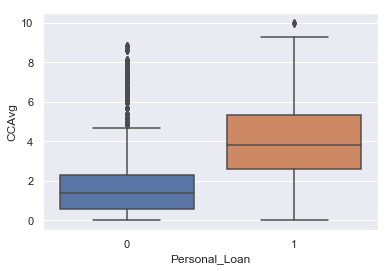

In [30]:
sns.boxplot(y='CCAvg',x='Personal_Loan',data = bank_df)

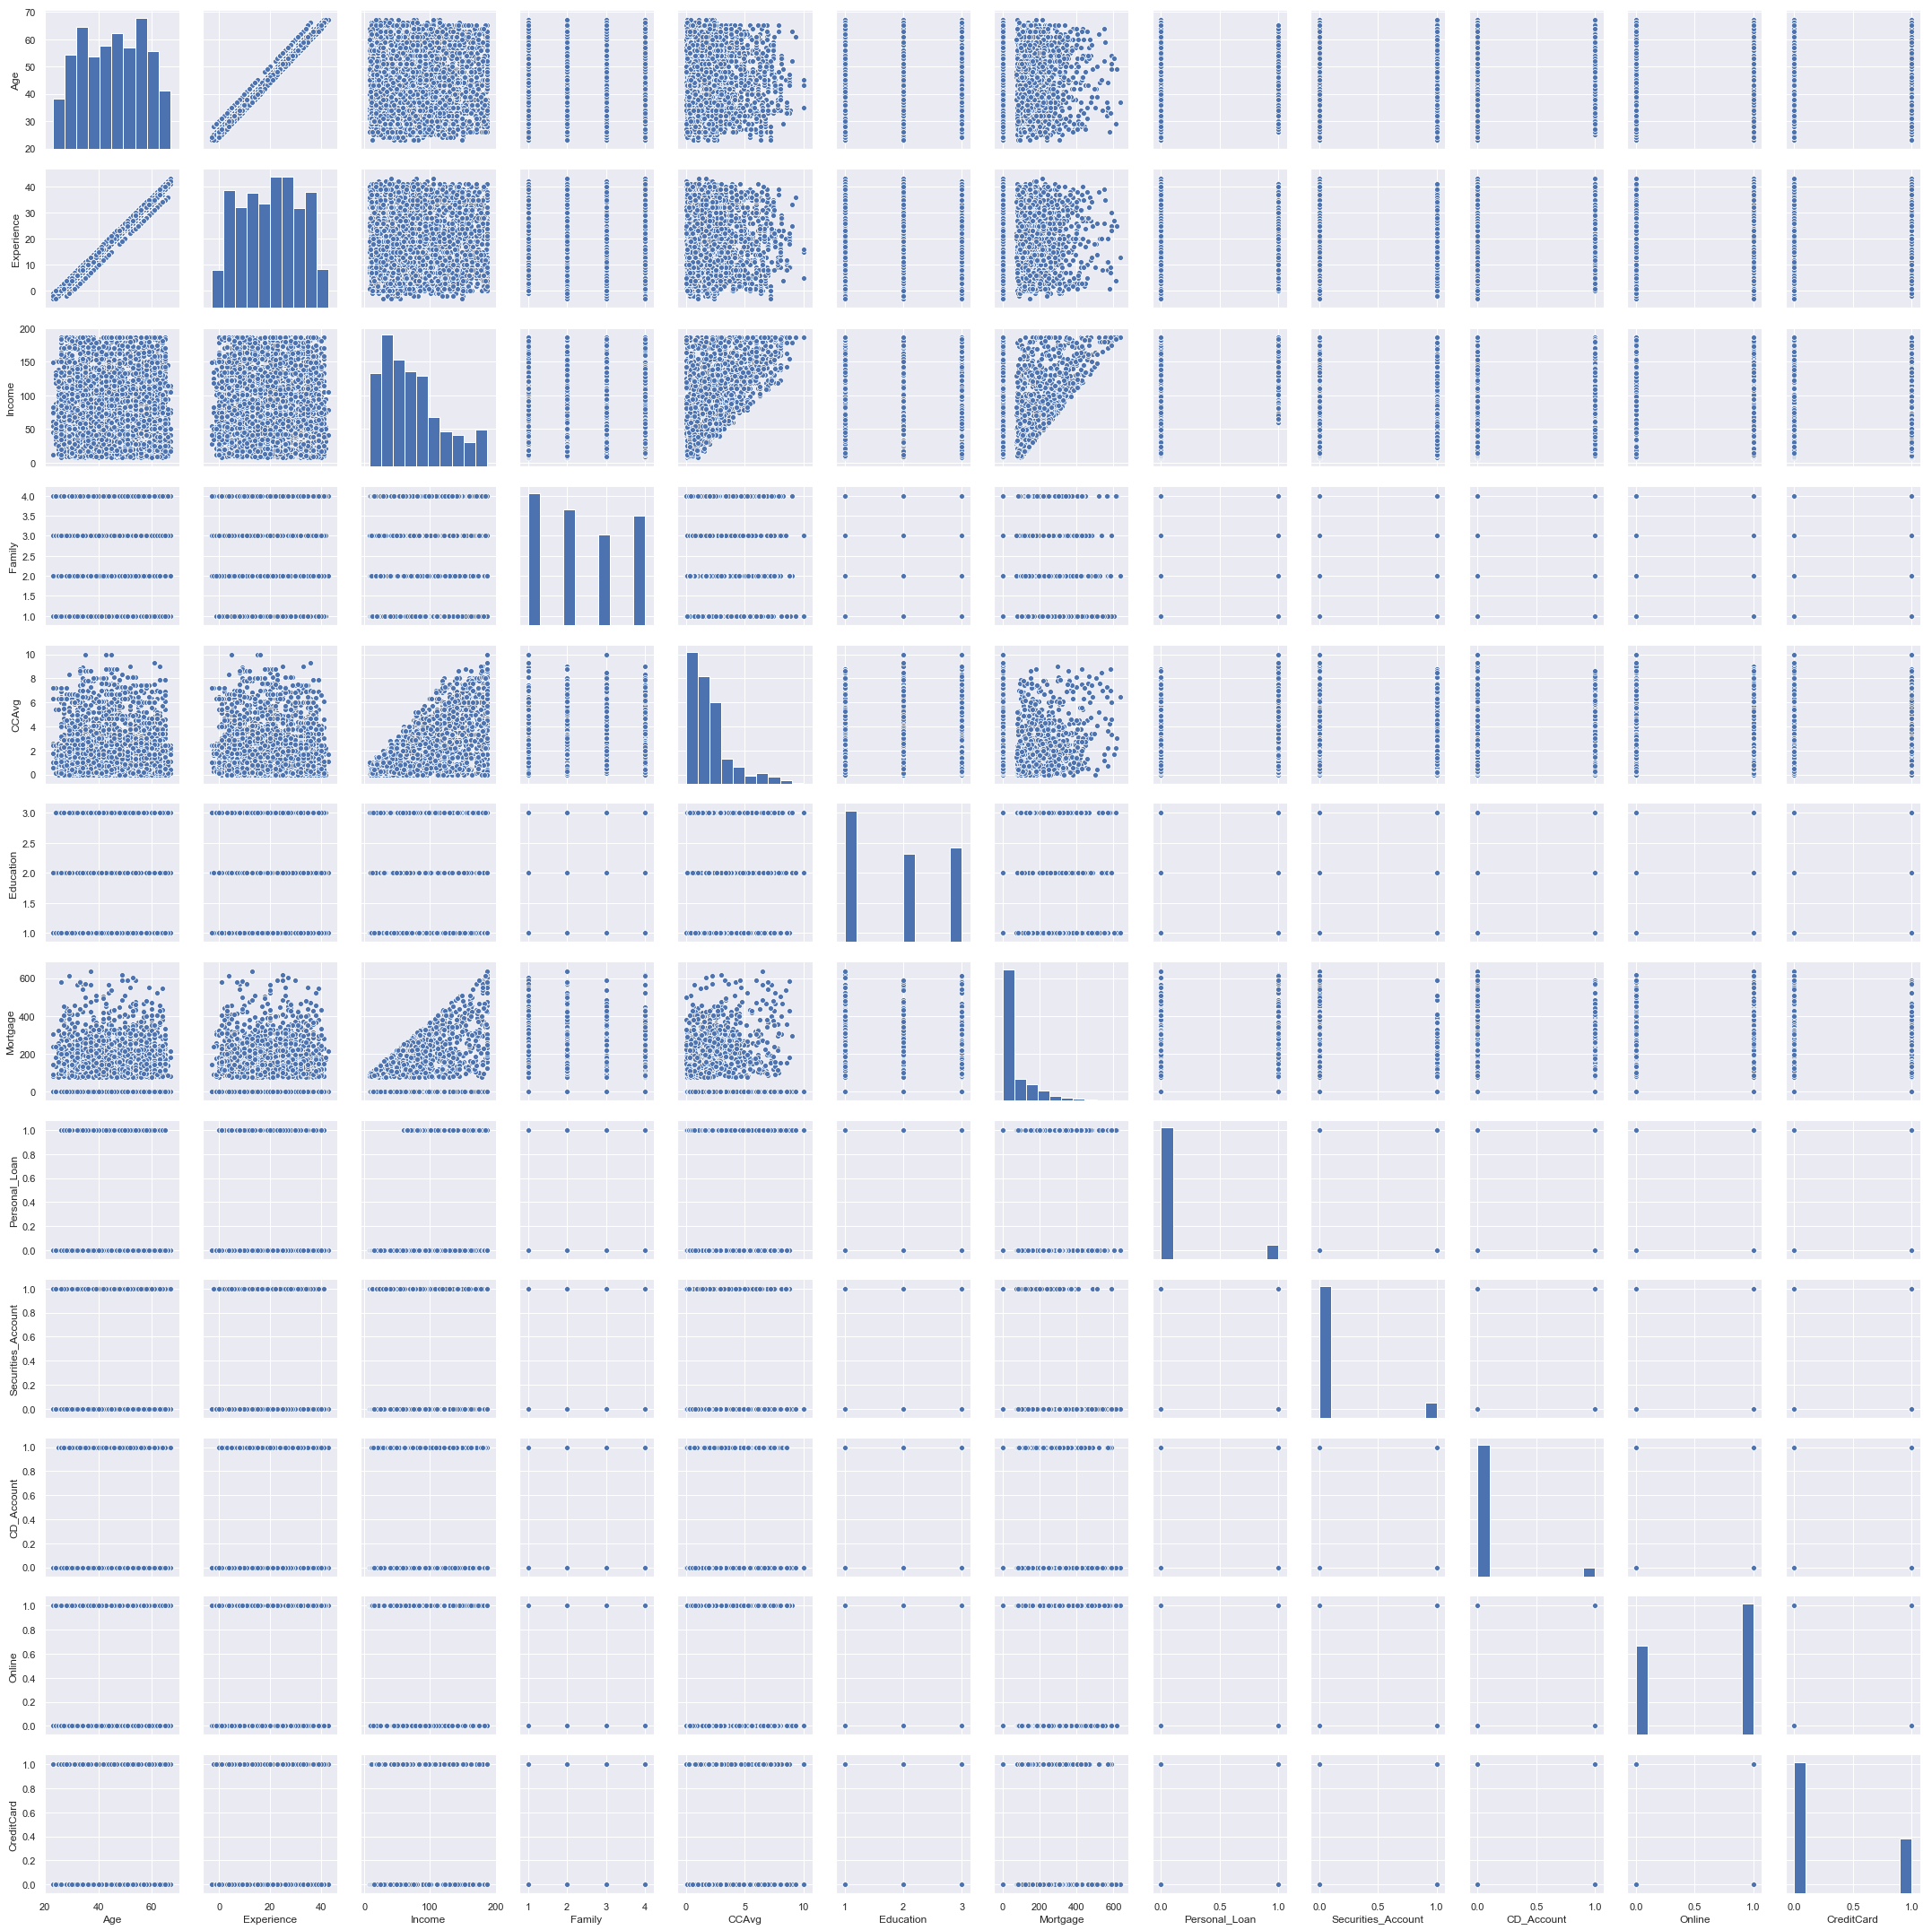

In [58]:
sns.pairplot(bank_df)

Since the pairplot shows the correlation among all the features in a graphical way, it becomes difficult to interpret using it.
So, we will check on the correlation using heatmap and correlation matrix


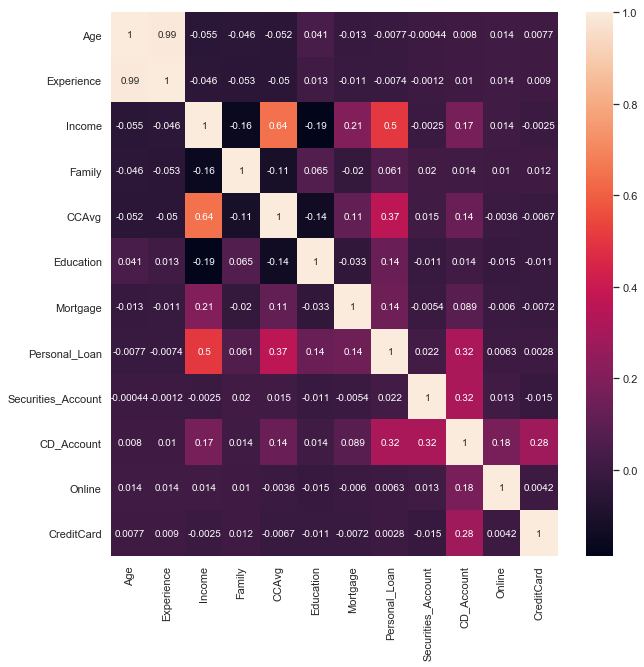

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(bank_df.corr(),annot = True)


In [33]:
bank_df.corr().loc['Personal_Loan']

Age                  -0.007726
Experience           -0.007413
Income                0.504559
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal_Loan         1.000000
Securities_Account    0.021954
CD_Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal_Loan, dtype: float64

From the correlation map and pairplot graph, we can infere that Income, CCAvg and CD Account 
are more corelated to Personal Loan and hence they are the most important features for this dataset. the constraints on the data collection may have skewed the distribution.
There is no obvious relationship between age and Personal_Loan also expiriance and personal loan.

# SUPERVISED LEARNING METHODS

Task 4. Split the data into training and test set in the ratio of 70:30 respectively 

In [34]:
X = bank_df.drop('Personal_Loan',axis=1)
y = bank_df['Personal_Loan']

In [35]:
# We will start with train test split of x and y with y as y_original from the original dataset

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

Task 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict
the likelihood of a liability customer buying personal loans.

Task 6. Print the confusion matrix for all the above models 

In [36]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred_log = log.predict(x_test)
log_unscaled = metrics.accuracy_score(y_test,y_pred_log)# calculate accuracy measures
print(metrics.accuracy_score(y_test,y_pred_log))

0.946


F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases
model_score = log.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_pred_log)) #confusion mattrix

0.946
[[1334   17]
 [  64   85]]


In [40]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
knn_unscaled = metrics.accuracy_score(y_test,y_pred_knn)
print(metrics.accuracy_score(y_test,y_pred_knn))

0.908


In [41]:
model_score = knn.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_pred_log))

0.908
[[1334   17]
 [  64   85]]


In [42]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
nb_unscaled = metrics.accuracy_score(y_test,y_pred_nb)
print(metrics.accuracy_score(y_test,y_pred_nb))

0.8773333333333333


In [43]:
model_score = nb.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_pred_log))

0.8773333333333333
[[1334   17]
 [  64   85]]


In [ ]:
# Improve the model -----------------------------Iteration 2 -----------------------------------------------

In [44]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(x_test)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
F:\anaconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [45]:
log2 = LogisticRegression()
log2.fit(X_train_scaled,y_train)
y_pred_log2 = log.predict(X_test_scaled)
log_scaled = metrics.accuracy_score(y_test,y_pred_log2)
print(metrics.accuracy_score(y_test,y_pred_log2))


0.8506666666666667


F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:

model_score2 = log2.score(X_test_scaled, y_test)
print(model_score2)
print(metrics.confusion_matrix(y_test, y_pred_log2))

0.9486666666666667
[[1214  137]
 [  87   62]]


In [51]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train_scaled,y_train)
y_pred_knn2 = knn2.predict(X_test_scaled)
knn_scaled = metrics.accuracy_score(y_test,y_pred_knn2)
print(metrics.accuracy_score(y_test,y_pred_knn2))

0.9533333333333334


In [52]:
model_score2 = knn2.score(X_test_scaled, y_test)
print(model_score2)
print(metrics.confusion_matrix(y_test, y_pred_knn2))

0.9533333333333334
[[1345    6]
 [  64   85]]


In [53]:
nb2 = GaussianNB()
nb2.fit(X_train_scaled,y_train)
y_pred_nb2 = nb2.predict(X_test_scaled)
nb_scaled = metrics.accuracy_score(y_test,y_pred_nb2)
print(metrics.accuracy_score(y_test,y_pred_nb2))



0.8733333333333333


In [ ]:
model_score2 = knn2.score(X_test_scaled, y_test)
print(model_score2)
print(metrics.confusion_matrix(y_test, y_pred_knn2))

Task 7. Give your reasoning on which is the best model in this case and why it performs
better?

In [54]:
accuracy = pd.DataFrame([[log_unscaled,log_scaled],
                         [knn_unscaled,knn_scaled],
                         [nb_unscaled,nb_scaled],],
                       columns = ['Unscaled Data','Scaled Data'],
                       index = ['Logistic Regression Model','KNN Model',
                               'Naive Bayes Model',])
accuracy

,Unscaled Data,Scaled Data
Logistic Regression Model,0.946000,0.850667
KNN Model,0.908000,0.953333
Naive Bayes Model,0.877333,0.873333


From the above comparisons of the accuracy scores, we can conclude that the accuracy of KNN model 
with scan model is highest since KNN model is less affected by outliers and outliers were present in  Mortgage and CCAvg attributes. 

*********************************  THE END *******************************************

                                                                 SUBMITTED BY - Ankita Jaodand
                                                                 Group 7, AIML program.